# Análise do Dataset da Google Play Store


Este notebook realiza análises no dataset da Google Play Store, incluindo gráficos e cálculos estatísticos baseados nos requisitos fornecidos.


### 4.1 - Etapa 1: Ambiente
Importar as bibliotecas Pandas e Matplotlib já instaladas.

In [166]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

### Etapa 2: Desenvolvimento
Gerar gráficos de análise do dataset do Google Play Store utilizando as bibliotecas Pandas e Matplotlib.

#### 1. Ler o arquivo `googleplaystore.csv` e remover as linhas duplicadas.

In [167]:
# Ler o dataset
caminho_arq = 'googleplaystore.csv'
arq_base = pd.read_csv(caminho_arq)

# Remover linhas duplicadas
dados = arq_base.drop_duplicates()

# Verificar o dataset após o tratamento
display(dados)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### 2. Fazer um gráfico de barras contendo os **top 5 apps por número de instalação**.

- Tratar e converter as colunas 'Installs' , 'Price' e 'Review

In [168]:
# Tratamento para 'Installs'
dados['Installs'] = pd.to_numeric(dados['Installs'].astype(str).str.replace('[+,]', '', regex=True), errors='coerce')
linhas_invalidas_installs = dados[dados['Installs'].isna()]
print("Linhas inválidas em 'Installs':")
display(linhas_invalidas_installs)
dados['Installs'] = dados['Installs'].fillna(0).astype(int)

Linhas inválidas em 'Installs':


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [169]:
# Tratamento para 'Price'
dados['Price'] = pd.to_numeric(dados['Price'].str.replace('$', '', regex=False).replace('Everyone', '0'), errors='coerce')
linhas_invalidas_price = dados[dados['Price'].isna()]
print("Linhas inválidas em 'Installs':")
display(linhas_invalidas_price)
dados['Price'] = dados['Price'].fillna(0).astype(float)

Linhas inválidas em 'Installs':


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [170]:
# Tratamento para 'Reviews'
dados['Reviews'] = pd.to_numeric(dados['Reviews'], errors='coerce')
linhas_invalidas_reviews = dados[dados['Reviews'].isna()]
print("Linhas inválidas em 'Reviews':")
display(linhas_invalidas_reviews)
dados['Reviews'] = dados['Reviews'].fillna(0).astype(int)

Linhas inválidas em 'Reviews':


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [171]:
# Verificando o dataset após o tratamento
display(dados)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


- Agrupar os dados por app pois ainda existem duplicidades nas colunas com valores

In [172]:
# Agrupar dados
dados_agg = dados.groupby('App').agg({
    'Category': 'first',  # Mantém a primeira categoria
    'Rating': 'max',     # Mantém a maior avaliação
    'Reviews': 'max',     # Mantém o maior número de reviews
    'Size': 'first',      # Mantém o primeiro tamanho
    'Installs': 'max',    # Mantém o maior número de instalações
    'Type': 'first',      # Mantém o primeiro tipo
    'Price': 'max',      # Mantém o maior preço
    'Content Rating': 'first',  # Mantém a primeira classificação de conteúdo
    'Genres': 'first',    # Mantém o primeiro gênero
    'Last Updated': 'first',  # Mantém a primeira data de atualização
    'Current Ver': 'first',   # Mantém a primeira versão atual
    'Android Ver': 'first'    # Mantém a primeira versão do Android
}).reset_index()

# Verificando o dataset após o tratamento
display(dados_agg)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
9656,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


- Gerar gráfico de barras

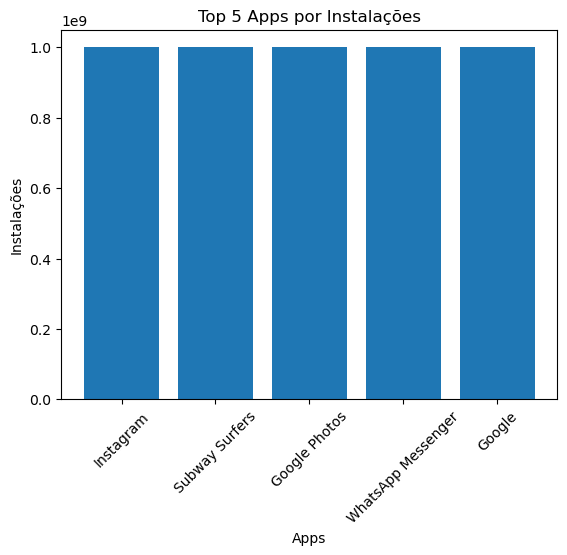

In [173]:
# Top 5 apps por número de instalações
top_installs = dados_agg.sort_values(by=['Installs', 'Rating', 'Reviews'], ascending =[False, False, False]).head(5)

# Gráfico
plt.bar(top_installs['App'], top_installs['Installs'])
plt.title('Top 5 Apps por Instalações')
plt.xlabel('Apps', fontsize=10)
plt.ylabel('Instalações')
plt.xticks(rotation=45)
plt.show()

#### 3. Fazer um gráfico de pizza (*pie chart*) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.

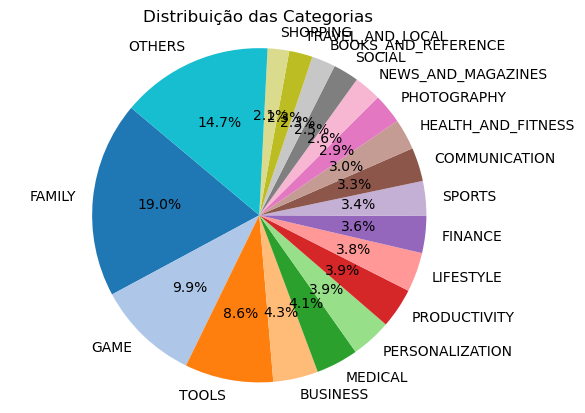

In [174]:
category_counts = dados_agg['Category'].value_counts(normalize=True) * 100

# Separar categorias menores de 2% de representação e agupar como categoria "outros"
grouped_categories = category_counts.copy()
grouped_categories[grouped_categories < 2] = 0
grouped_categories['OTHERS'] = category_counts[category_counts < 2].sum()

grouped_categories = grouped_categories[grouped_categories > 0]

# Gráfico
plt.pie(grouped_categories, labels=grouped_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição das Categorias')
plt.axis('equal')
plt.show()



#### 4. Mostrar qual o **app mais caro** existente no dataset.

In [175]:
most_expensive_app = dados_agg.loc[dados_agg['Price'].idxmax()]
print('App mais caro:', most_expensive_app['App'], 'com preço de $', most_expensive_app['Price'])

App mais caro: I'm Rich - Trump Edition com preço de $ 400.0


#### 5. Mostrar quantos apps são classificados como **'Mature 17+'**.

In [176]:
mature_apps_count = dados_agg[dados_agg['Content Rating'] == 'Mature 17+'].shape[0]
print('Quantidade de apps "Mature 17+":', mature_apps_count)

Quantidade de apps "Mature 17+": 393


#### 6. Mostrar o **top 10 apps por número de reviews** bem como o respectivo número de reviews. Ordenar a lista de forma decrescente por número de reviews.

In [177]:
top_reviews = dados_agg.nlargest(10, 'Reviews')[['App', 'Reviews']]
print(top_reviews.to_string(index=False))

                                               App  Reviews
                                          Facebook 78158306
                                WhatsApp Messenger 69119316
                                         Instagram 66577446
          Messenger – Text and Video Chat for Free 56646578
                                    Clash of Clans 44893888
           Clean Master- Space Cleaner & Antivirus 42916526
                                    Subway Surfers 27725352
                                           YouTube 25655305
Security Master - Antivirus, VPN, AppLock, Booster 24900999
                                      Clash Royale 23136735


#### 7. Criar pelo menos mais **2 cálculos sobre o dataset** e apresentar um em formato de lista e outro em formato de valor.

- Top 15 aplicativos com mais tempo sem atualização, usando como referência a data máxima encontrada no dataset 

In [178]:
# Converter a coluna 'Last Updated' para datetime
dados_agg['Last Updated'] = pd.to_datetime(dados_agg['Last Updated'], errors='coerce')

# Encontrar a data máxima no dataset
data_maxima = dados_agg['Last Updated'].max()

# Calcular o tempo sem atualização em dias
dados_agg['Days Since Last Update'] = (data_maxima - dados_agg['Last Updated']).dt.days

# Filtrar os top 15 aplicativos com mais tempo sem atualização
top_old_apps = dados_agg.sort_values(by='Days Since Last Update', ascending=False).head(15)

# Exibir a lista de aplicativos com mais tempo sem atualizações
display (top_old_apps)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days Since Last Update
4254,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.00,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,3001.0
2054,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.00,Everyone,Card,2011-01-30,1.2,1.6 and up,2747.0
4141,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.00,Everyone,Tools,2011-03-16,1.2.4,1.6 and up,2702.0
2855,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.00,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up,2676.0
4660,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.00,Everyone,Card,2011-04-16,1.3.3,1.6 and up,2671.0
3506,Dx Ludo,FAMILY,3.6,215,2.6M,50000,Free,0.00,Everyone,Puzzle,2011-04-18,1.0,2.1 and up,2669.0
237,AH Alarm Panel,TOOLS,3.9,7,81k,100,Paid,4.99,Everyone,Tools,2011-05-12,1.2.0,1.5 and up,2645.0
1992,CF-Bench Pro,TOOLS,4.6,159,29k,1000,Paid,1.49,Everyone,Tools,2011-06-23,1.1,1.6 and up,2603.0
9076,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26k,5000,Paid,1.00,Everyone,Tools,2011-06-26,1.0.0,2.1 and up,2600.0
778,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,292k,1000000,Free,0.00,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up,2597.0


- App da catagoria "GAME" com o maior preço

In [179]:
# Game mais caro
most_expensive_beauty_app =  (dados_agg[dados_agg['Category'] =='GAME']).loc[ (dados_agg[dados_agg['Category'] =='GAME'])['Price'].idxmax()]
print('Game mais caro de é:', most_expensive_beauty_app['App'], 'com preço de $', most_expensive_beauty_app['Price'])


Game mais caro de é: The World Ends With You com preço de $ 17.99


#### 8. Criar pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos de gráficos diferentes dos explorados acima.

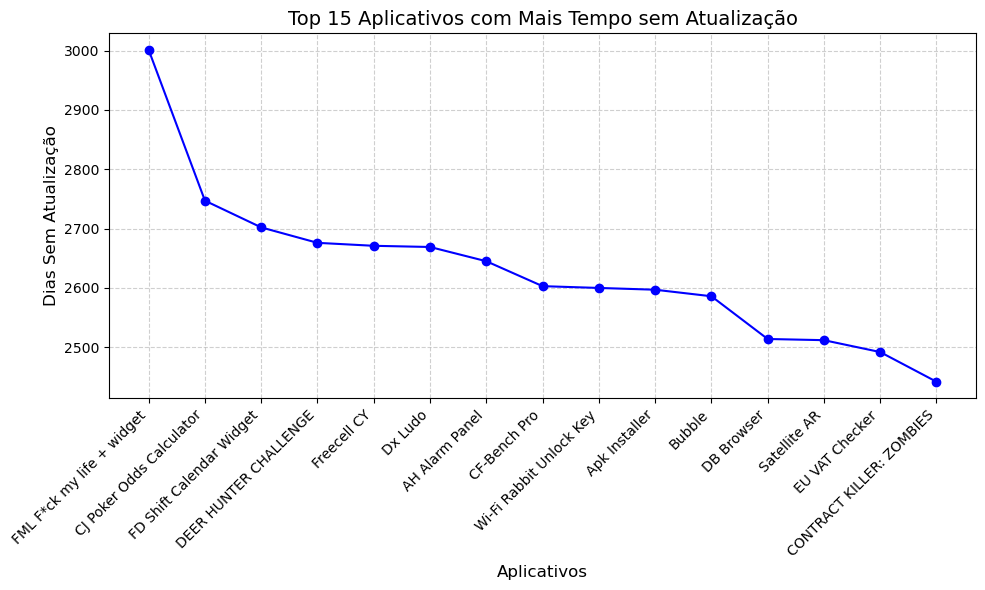

In [180]:
# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(top_old_apps['App'], top_old_apps['Days Since Last Update'], marker='o', linestyle='-', color='b')
plt.title('Top 15 Aplicativos com Mais Tempo sem Atualização', fontsize=14)
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Dias Sem Atualização', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir o gráfico
plt.show()

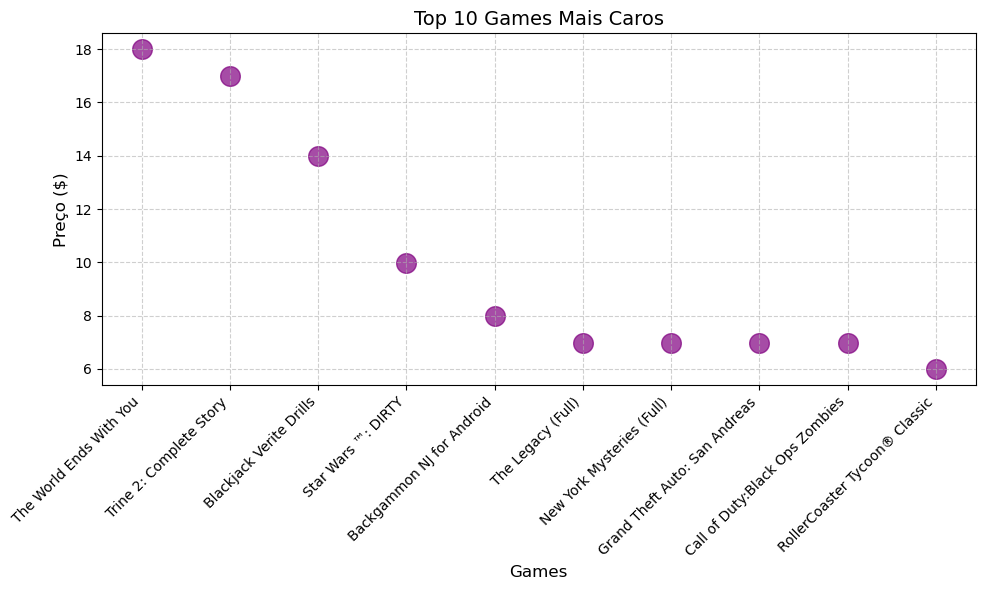

In [181]:
# Filtrar os 10 games mais caros
top_expensive_games = (
    dados_agg[dados_agg['Category'] == 'GAME']
    .sort_values(by='Price', ascending=False)
    .head(10)
)

# Criar um gráfico de dispersão para os 10 games mais caros
plt.figure(figsize=(10, 6))
plt.scatter(top_expensive_games['App'], top_expensive_games['Price'], s=200, alpha=0.7, color='purple')
plt.title('Top 10 Games Mais Caros', fontsize=14)
plt.xlabel('Games', fontsize=12)
plt.ylabel('Preço ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir o gráfico
plt.show()